In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.arange(0,10,0.001)
clean_signal = 3*np.sin(2*np.pi*t+np.pi/2)+np.cos(2*np.pi*t/2-np.pi/3) - np.exp(2*np.sin(3*np.pi*t))
noise = np.random.uniform(np.min(clean_signal)/3, np.max(clean_signal)/3, len(t))
noisy_signal = clean_signal + noise


In [3]:
fil = np.ones(100)

s_convol = np.ones(len(clean_signal)+2*len(fil)//2-1)
s_convol[len(fil)//2:len(fil)//2+len(clean_signal)] = noisy_signal
print(len(s_convol))

10099


In [4]:
s_matrix = []
for i in range(len(clean_signal)):
    s_matrix.append(s_convol[i:i+len(fil)])

# print(len(s_matrix))
s_matrix = np.array(s_matrix)
print(s_matrix.shape)

(10000, 100)


In [5]:
c = np.linalg.lstsq(s_matrix, clean_signal)
print(c[0])

<ipython-input-5-2078be7ffb5b>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(s_matrix, clean_signal)


[-4.96468018e-02 -4.62645664e-02 -4.35261277e-02 -3.91202210e-02
 -3.65092092e-02 -3.26712665e-02 -2.85881888e-02 -2.57406298e-02
 -2.25203471e-02 -1.98107362e-02 -1.64008501e-02 -1.33119320e-02
 -1.09941499e-02 -9.33415253e-03 -7.98090348e-03 -5.48776621e-03
 -4.17149296e-03 -2.62339530e-03  9.06947791e-05  2.35045803e-03
  5.17956587e-03  6.62716148e-03  9.34996829e-03  1.18561005e-02
  1.54409437e-02  1.70501065e-02  1.81059115e-02  1.84620425e-02
  2.03641122e-02  2.31763845e-02  2.51088062e-02  2.71709592e-02
  2.89459325e-02  2.97110607e-02  3.02176852e-02  3.05067912e-02
  3.19730263e-02  3.29021031e-02  3.28515945e-02  3.29132253e-02
  3.22973547e-02  3.21569468e-02  3.16987474e-02  3.15558206e-02
  3.27230182e-02  3.40855552e-02  3.59013808e-02  3.54659436e-02
  3.51989422e-02  3.63014783e-02  3.63743176e-02  3.55148224e-02
  3.59117745e-02  3.63103318e-02  3.46215247e-02  3.34734653e-02
  3.22178483e-02  3.23021800e-02  3.27964030e-02  3.26427044e-02
  3.29422568e-02  3.28807

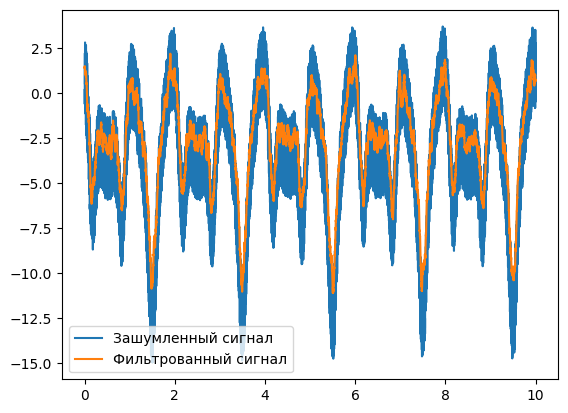

In [6]:
s_filt = s_matrix @ c[0]#[::-1]
plt.plot(t, noisy_signal, label = 'Зашумленный сигнал')
plt.plot(t, s_filt, label = 'Фильтрованный сигнал')
plt.legend()
plt.show()

(array([ 465.,  230.,  220.,  465., 1045., 1000., 3010.,  850., 1130.,
        1585.]),
 array([-1.12559325e+01, -9.84879258e+00, -8.44165266e+00, -7.03451274e+00,
        -5.62737283e+00, -4.22023291e+00, -2.81309299e+00, -1.40595307e+00,
         1.18684274e-03,  1.40832676e+00,  2.81546668e+00]),
 <BarContainer object of 10 artists>)

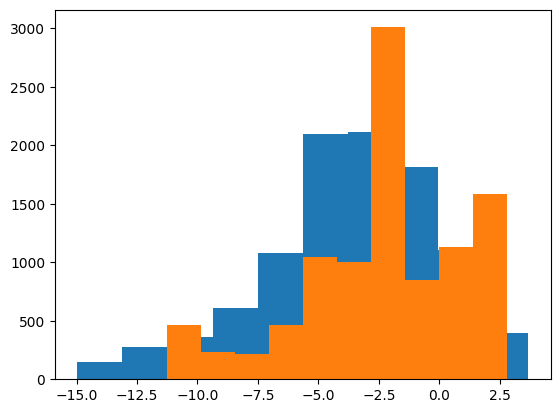

In [8]:
plt.hist(noisy_signal)
plt.hist(clean_signal)

In [9]:


learning_rate = 0.0001
filter_order = 32


adaptive_filter = np.zeros(filter_order)


for i in range(filter_order, len(noisy_signal)):
    input_vector = noisy_signal[i - filter_order:i][::-1]
    prediction = np.dot(adaptive_filter, input_vector)
    error = noisy_signal[i] - prediction
    adaptive_filter += learning_rate * error * input_vector


filtered_signal = np.convolve(noisy_signal, adaptive_filter, mode='same')


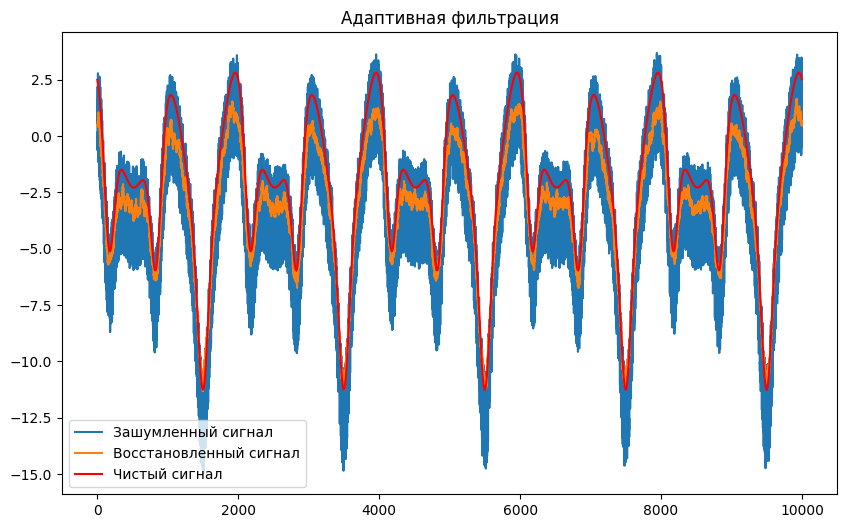

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(noisy_signal, label='Зашумленный сигнал')
plt.plot(filtered_signal, label='Восстановленный сигнал')
plt.plot(clean_signal, label='Чистый сигнал', c='r')
plt.legend()
plt.title('Адаптивная фильтрация')
plt.show()
